# Linear regression to predict Price of a house in USA
- by Abhinav

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("USA_Housing.csv")

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.drop('Address',axis=1, inplace=True)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


### Missing values analysis

<Axes: >

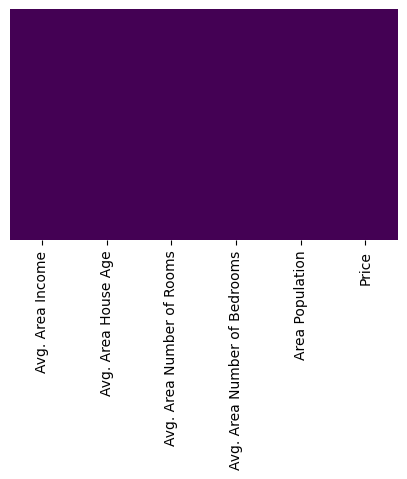

In [7]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## There is no empty columns

**All availabe feature is Average so rounding off**

In [8]:
x = df.columns
for i in x:
    df[i] = df[i].round()

In [9]:
df.rename(columns = {'Avg. Area Number of Rooms':'Rooms', 'Avg. Area House Age': 'House Age', 'Avg. Area Income': 'Area Income'}, inplace = True)

In [10]:
df

,Area Income,House Age,Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.0,6.0,7.0,4.0,23087.0,1059034.0
1,79249.0,6.0,7.0,3.0,40173.0,1505891.0
2,61287.0,6.0,9.0,5.0,36882.0,1058988.0
3,63345.0,7.0,6.0,3.0,34310.0,1260617.0
4,59982.0,5.0,8.0,4.0,26354.0,630943.0
...,...,...,...,...,...,...
4995,60568.0,8.0,6.0,3.0,22837.0,1060194.0
4996,78491.0,7.0,7.0,4.0,25616.0,1482618.0
4997,63391.0,7.0,5.0,2.0,33266.0,1030730.0
4998,68001.0,6.0,7.0,5.0,42626.0,1198657.0


<Axes: xlabel='Price', ylabel='Count'>

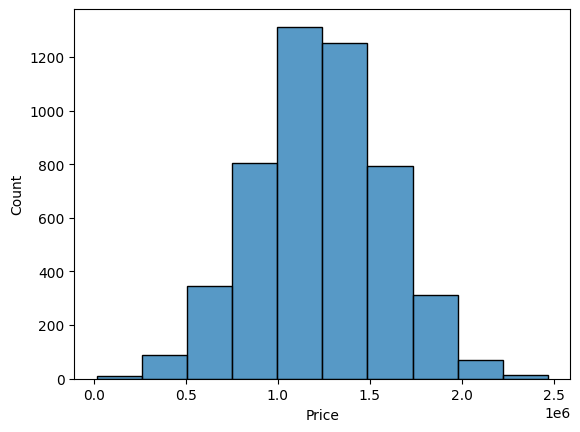

In [11]:
sns.histplot(df['Price'], bins=10)

### Insight
- Most houses have average price between 0.8 millions to 1.8 millions


<Axes: xlabel='House Age', ylabel='Price'>

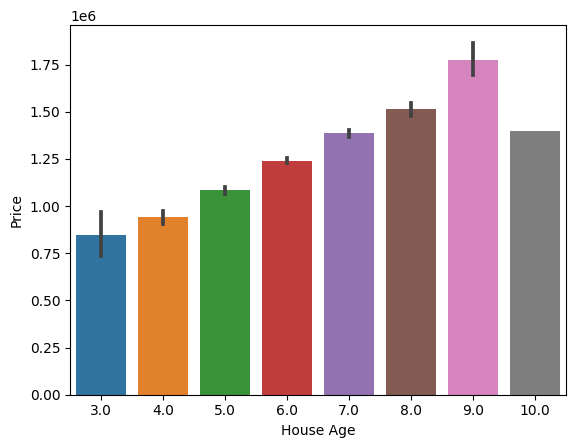

In [12]:
sns.barplot(x ='House Age', y ='Price', data=df)

### Insight
- Price Increases as the Age of house increases.
- After the age of 9 years house price starts decreasing. 


<Axes: xlabel='House Age', ylabel='Price'>

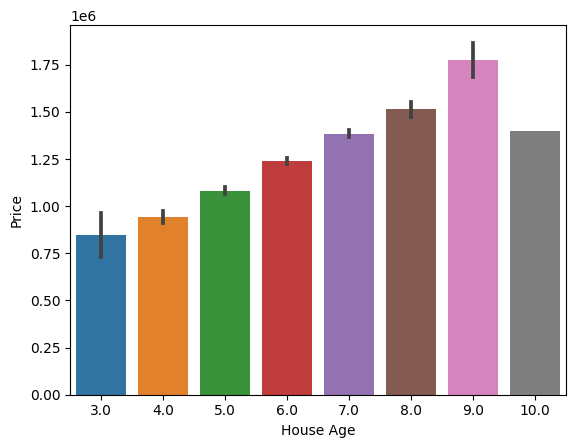

In [13]:
sns.barplot(x ='House Age', y ='Price', data=df)

### Insight
- Price Increases as the No. of rooms in a house increase. 


<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

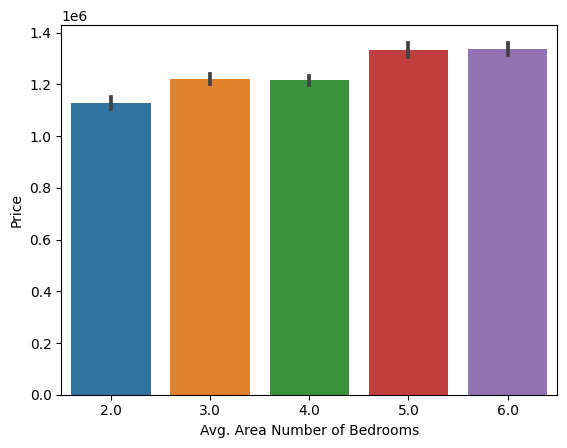

In [14]:
sns.barplot(x ='Avg. Area Number of Bedrooms', y ='Price', data=df)

### Insight
- Average area of Number of Bedrooms is not an import feature. So droping this feature


In [15]:
df.drop(['Avg. Area Number of Bedrooms'], axis=1 , inplace=True)

<Axes: xlabel='Area Population', ylabel='Price'>

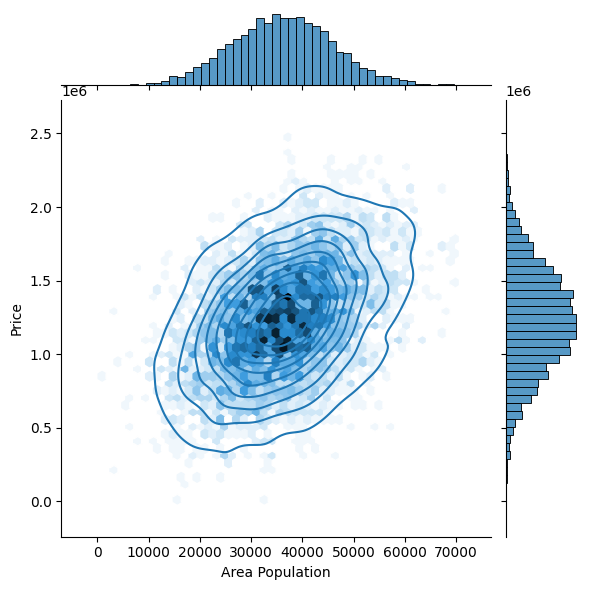

In [20]:
# sns.lineplot(x ='Area Population', y ='Price', data=df)
sns.jointplot(x ='Area Population', y ='Price', data=df, kind='hex')
sns.kdeplot(x ='Area Population', y ='Price', data=df)

### Insight
- Price is more in more populated Areas

<Axes: >

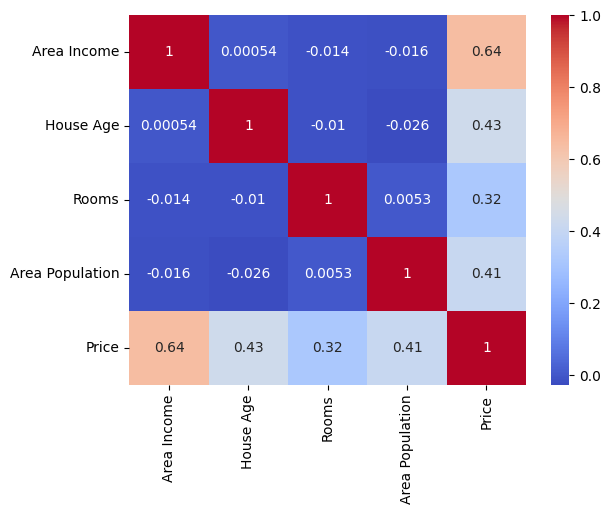

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Machine learning model training

In [18]:
x= df.drop(['Price'], axis=1)
y = df['Price']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [21]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
print('Model Accuracy: ', round(r2_score(y_test, pred),2)*100, '%')


Model Accuracy:  89.0 %


Text(0.5, 1.0, 'Actual vs Predicted Graph')

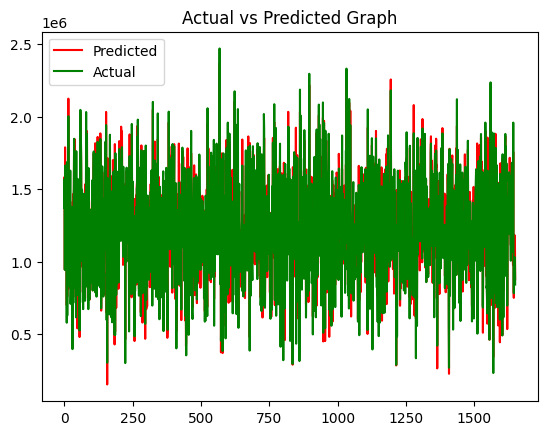

In [31]:
plt.plot([i for i in range(len(pred))],pred, color="red", label='Predicted')
plt.plot([i for i in range(len(y_test))],y_test, color="green", label='Actual')
plt.legend()
plt.title("Actual vs Predicted Graph")

## Driver to test and understand how ml model works in real life


In [32]:
a = 'y'
while a =='y':
    b = int(input("Enter Average area Income in $: "))
    c = int(input("Enter House Age in years: "))
    d = int(input("Enter No. of rooms: "))
    e = int(input("Enter average population of area you looking : "))
    f = {"Area Income":[b] ,"House Age":[c], "Rooms": [d], "Area Population":[e]}
    f =pd.DataFrame(f)
    g = model.predict(f)
    print("\n\n")
    print("Average price of your house will be around : " , round(g[0]/1000,2), "K $")
    print('\n\n')
    print("Average price of your house will be around : " , round((g[0]*82.04)/10000000,2), "Crores Rupees")
    print('\n\n')
    a = input("Do you want to continue? [y/n]")
    

Enter Average area Income in $: 1000
Enter House Age in years: 8
Enter No. of rooms: 2
Enter average population of area you looking : 70000



Average price of your house will be around :  34.59 K $



Average price of your house will be around :  0.28 Crores Rupees



Do you want to continue? [y/n]y
Enter Average area Income in $: 90000
Enter House Age in years: 30
Enter No. of rooms: 12
Enter average population of area you looking : 10000



Average price of your house will be around :  5511.41 K $



Average price of your house will be around :  45.22 Crores Rupees



Do you want to continue? [y/n]n


In [33]:
5511.41 *82.04


452156.0764